In [3]:
# Import standard libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML libraries second
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Additional tools
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
# plt.style.use('seaborn')

# Set random seed
np.random.seed(42)

Dataset Shape: (12330, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non

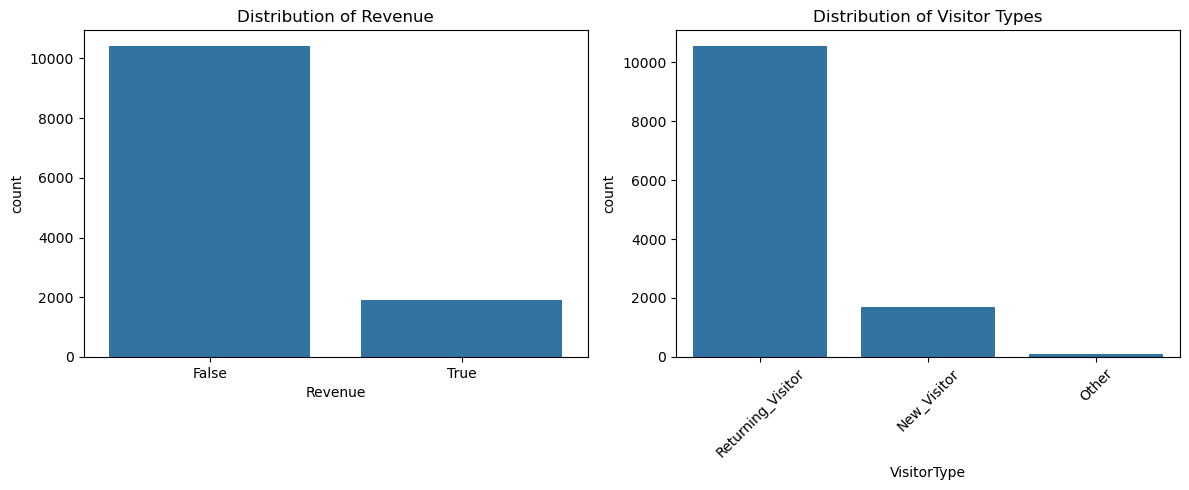

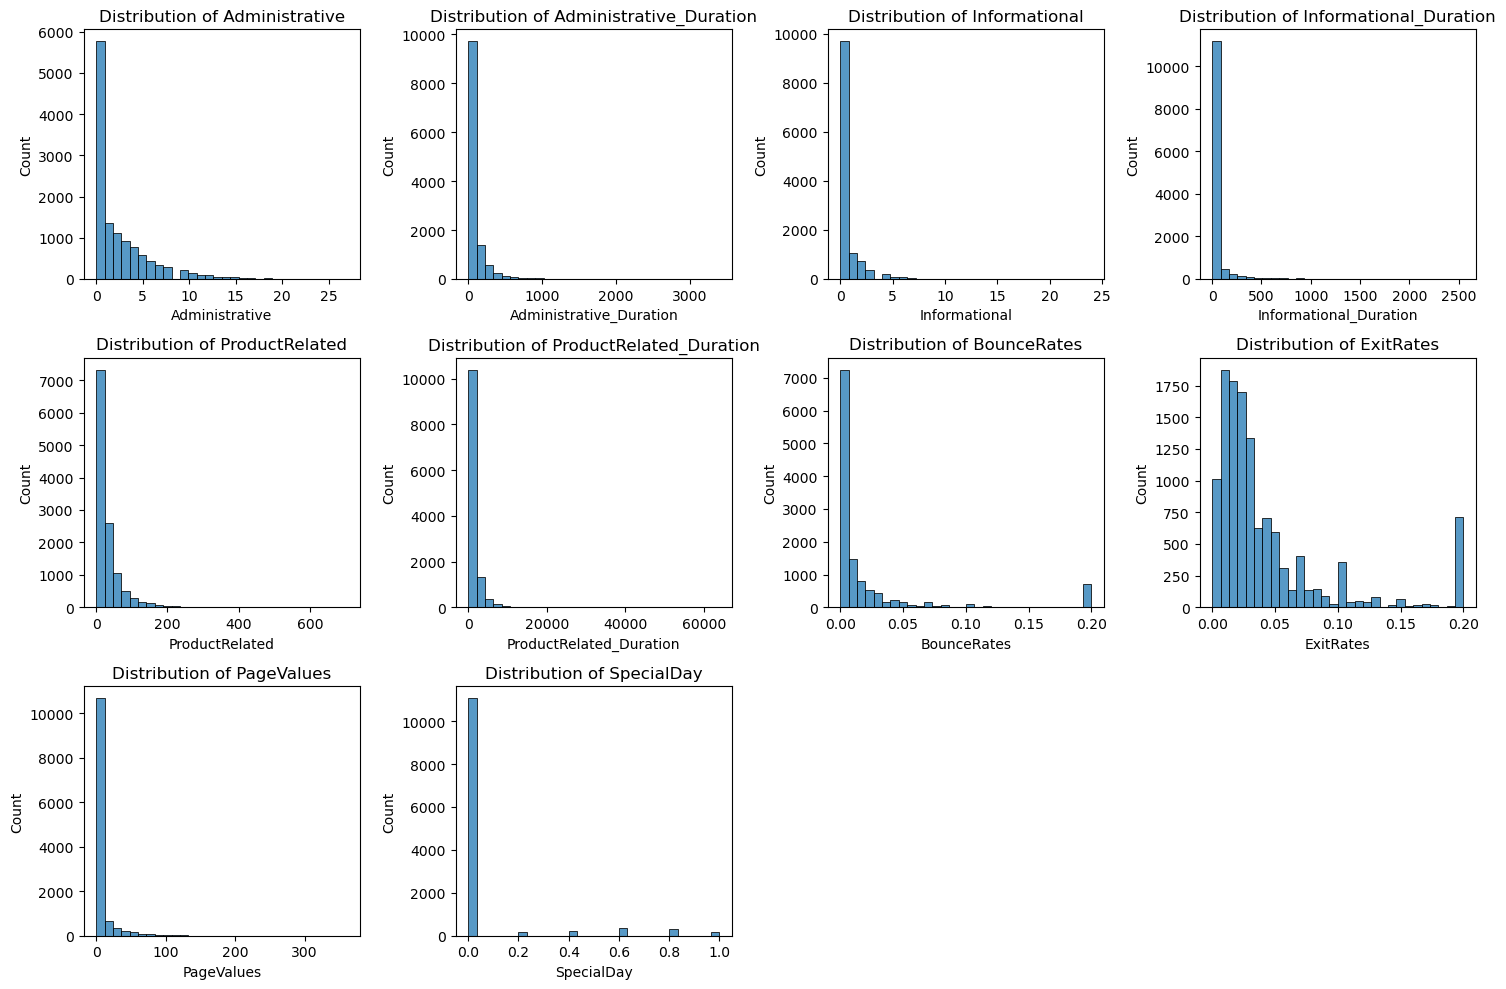

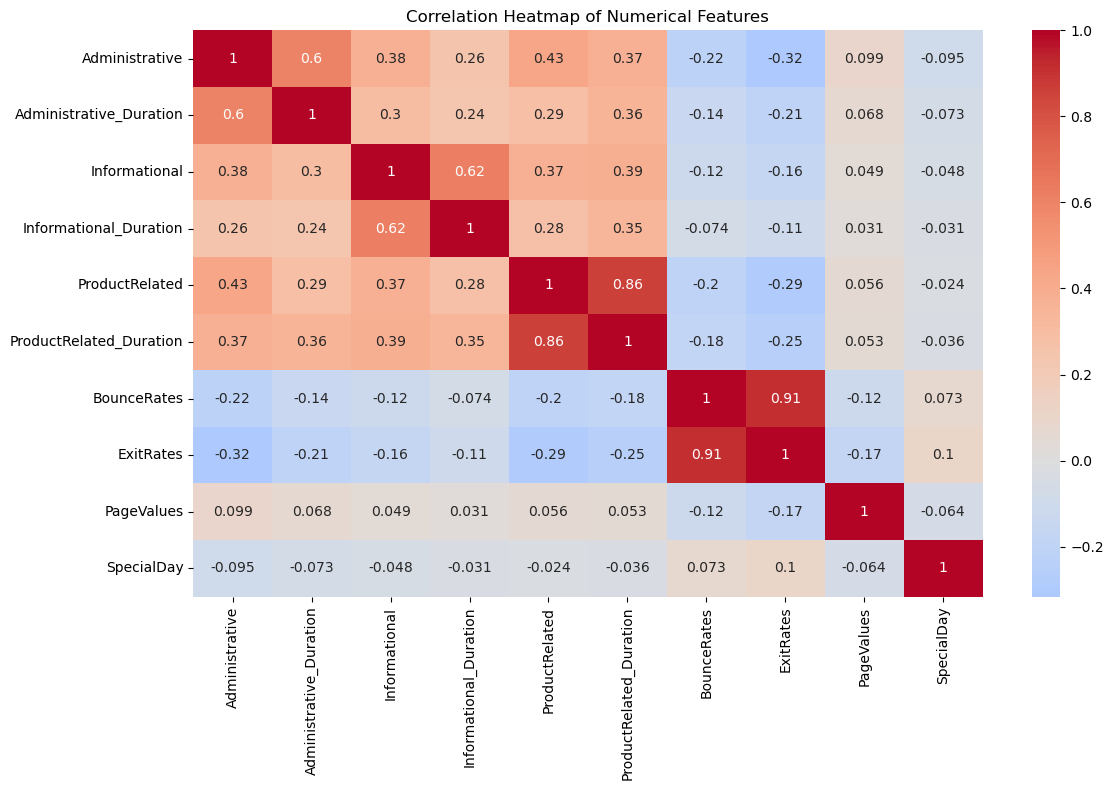

In [4]:
# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display first few rows
print("\nFirst Few Rows:")
print(df.head())

# Check class distribution (target variable)
print("\nClass Distribution (Revenue):")
print(df['Revenue'].value_counts(normalize=True))

# Basic visualizations
plt.figure(figsize=(12, 5))

# Distribution of Revenue (target variable)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Revenue')
plt.title('Distribution of Revenue')

# Distribution of VisitorType
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='VisitorType')
plt.xticks(rotation=45)
plt.title('Distribution of Visitor Types')
plt.tight_layout()
plt.show()

# Distribution of numerical features
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [5]:
# Function to preprocess the data
def preprocess_data(df):
    """
    Preprocess the input DataFrame.
    """
    # Create copy to avoid modifying original data
    processed_df = df.copy()

    # Convert Revenue to numeric if it exists (target variable)
    if 'Revenue' in processed_df.columns:
        processed_df['Revenue'] = processed_df['Revenue'].astype(int)

    # One-hot encode categorical variables
    categorical_cols = ['VisitorType', 'Month', 'Weekend', 'Browser', 'Region', 'TrafficType', 'Revenue', 'OperatingSystems']
    processed_df = pd.get_dummies(processed_df)

    return processed_df

# Preprocess the data
df_processed = preprocess_data(df)

# Display the changes
print("Original columns:", df.columns.tolist())
print("\nProcessed columns:", df_processed.columns.tolist())

# Prepare features and target
X = df_processed.drop('Revenue', axis=1)
y = df_processed['Revenue']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Original columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Processed columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

Training set shape: (9864, 28)
Testing set shape: (2466, 28)

Class distribution in training set:
Revenue
0    0.848236
1    0.151764
Name: proportion, dtype: float64

Class distribution in


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.78      0.53      0.63       411

    accuracy                           0.90      2466
   macro avg       0.85      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



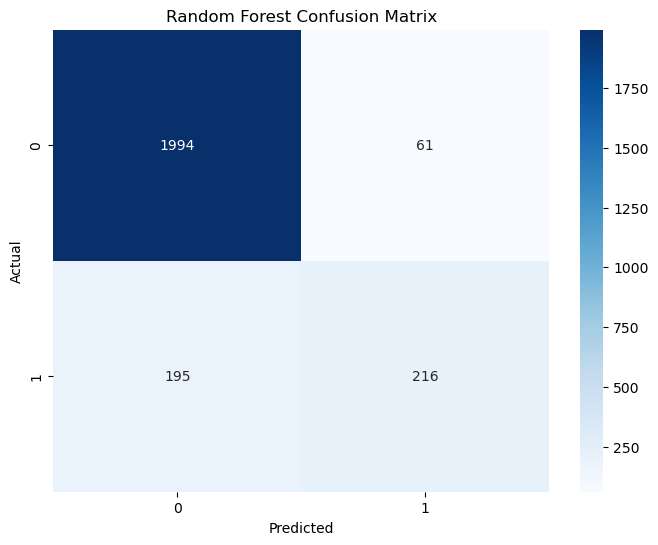

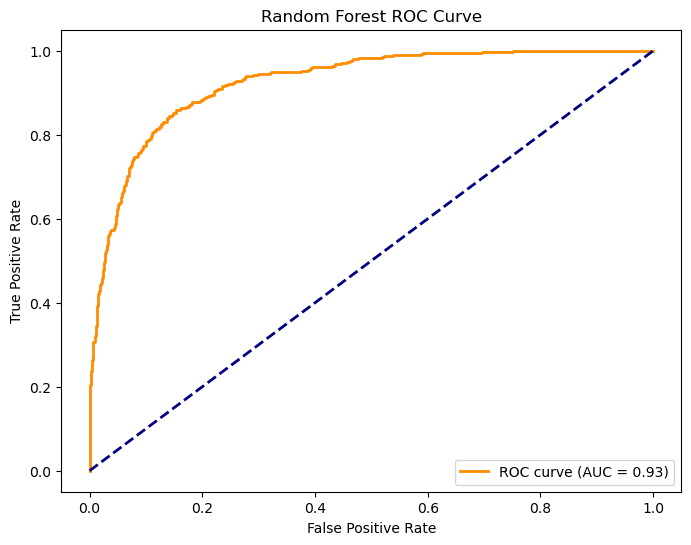

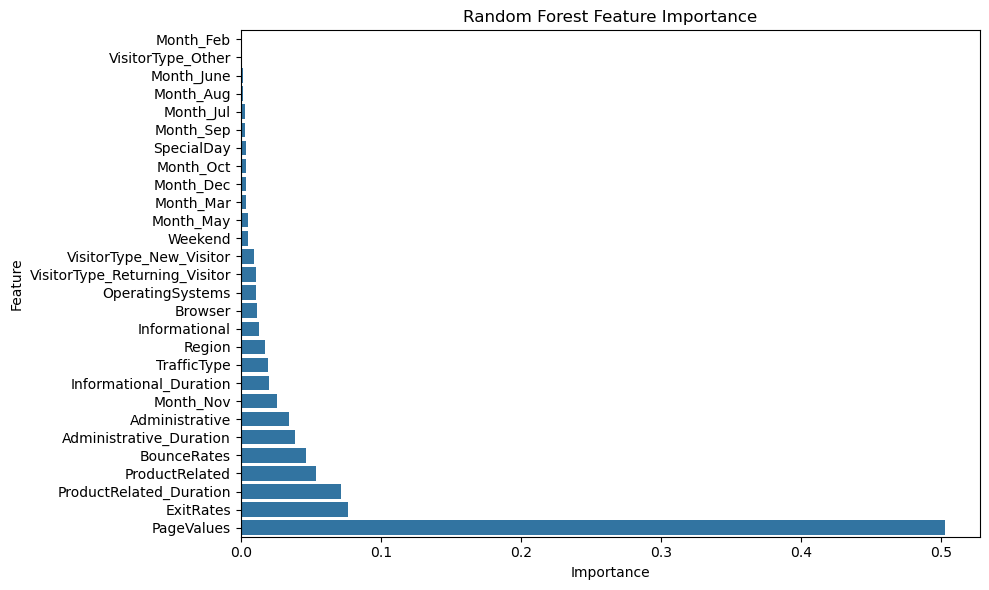


Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.71      0.57      0.63       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



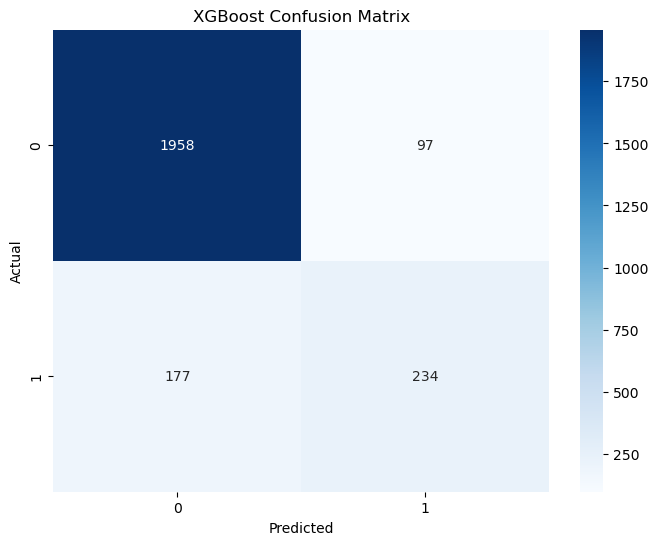

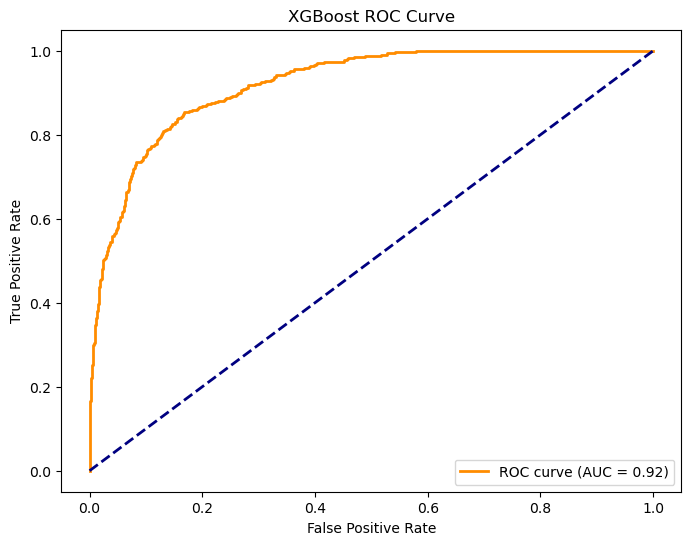

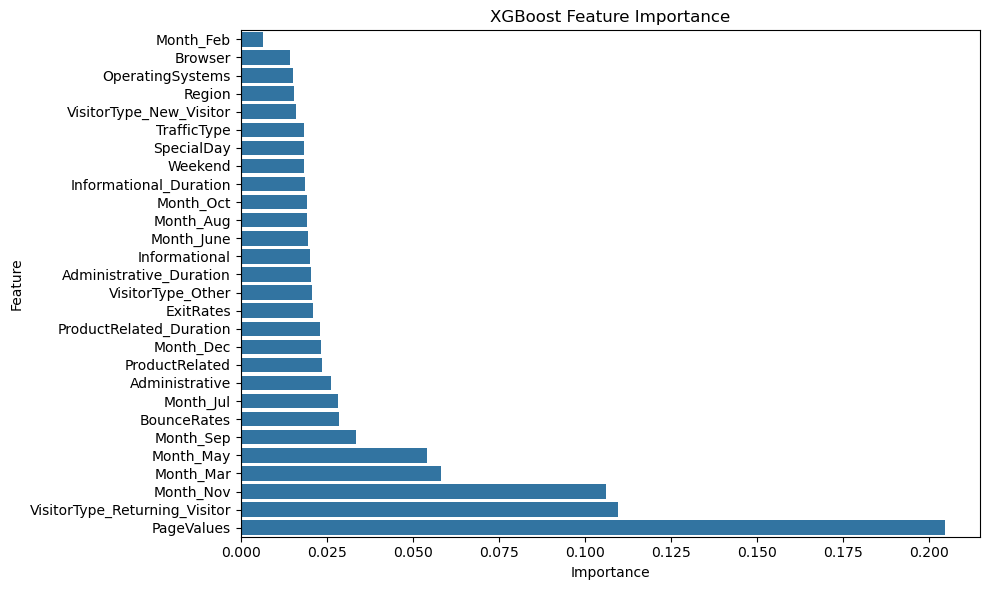


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.57      0.57      0.57       411

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



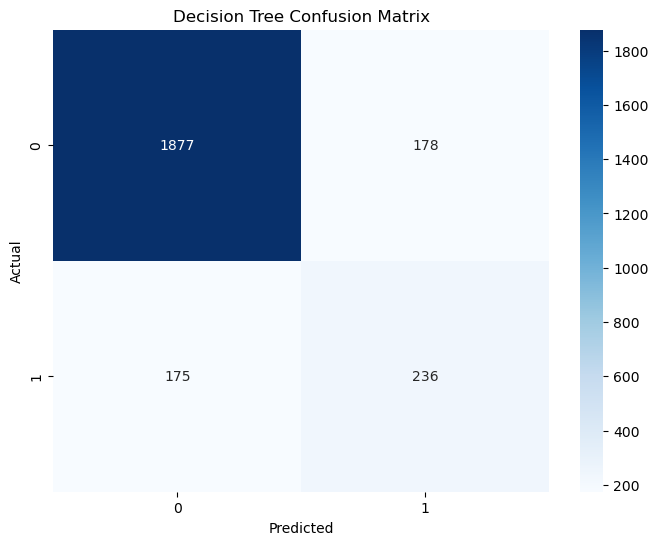

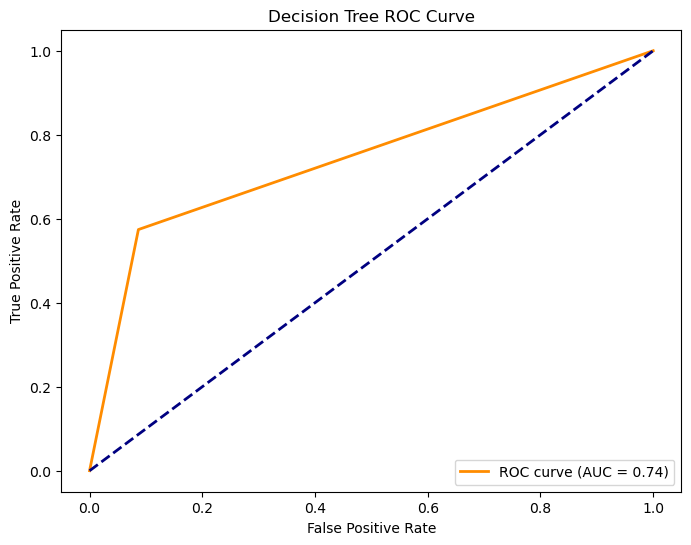

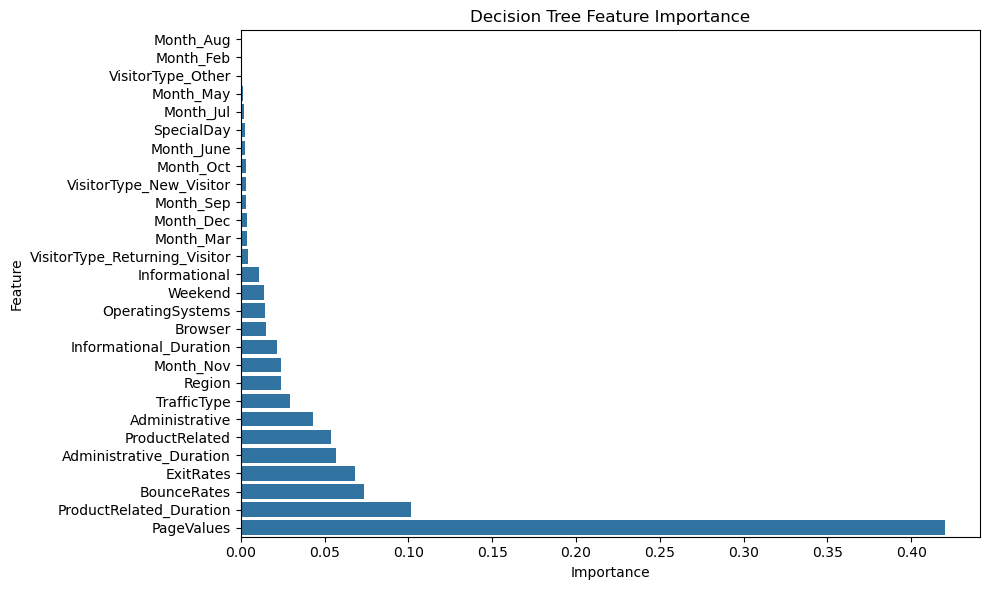

In [6]:
# Initialize models
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

xgb_model = XGBClassifier(
    random_state=42
)

dt_model = DecisionTreeClassifier(random_state = 42)

# Dictionary to store results
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Decision Tree': dt_model
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'feature_importance': dict(zip(X.columns, model.feature_importances_))
    }

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot feature importance
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title(f'{name} Feature Importance')
    plt.tight_layout()
    plt.show()

Model Performance Comparison:
           Model  Accuracy  ROC AUC  Precision  Recall  F1 Score
0  Random Forest     0.896    0.925      0.780   0.526     0.628
0        XGBoost     0.889    0.920      0.707   0.569     0.631
0  Decision Tree     0.857    0.744      0.570   0.574     0.572


ValueError: num must be an integer with 1 <= num <= 2, not 3

<Figure size 1200x600 with 0 Axes>

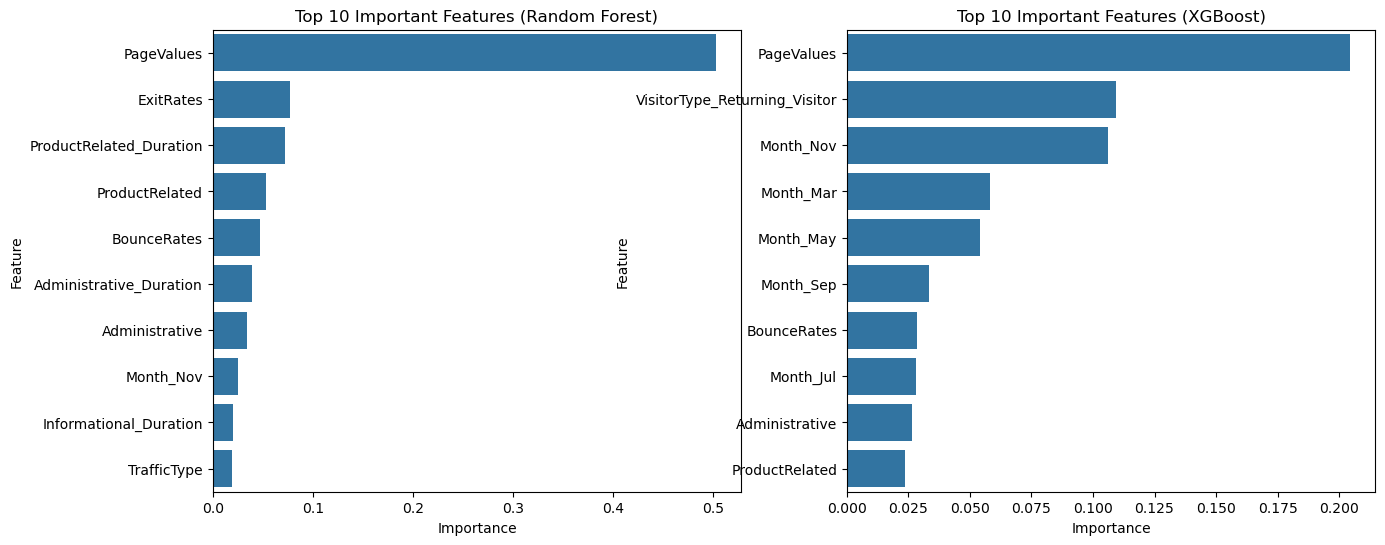

In [7]:
# Compare model performances
model_comparison = pd.DataFrame()

for name, result in results.items():
    # Calculate metrics
    y_pred = result['predictions']
    y_pred_proba = result['probabilities']

    # Accuracy
    accuracy = (y_test == y_pred).mean()

    # ROC AUC
    roc_auc = auc(
        *roc_curve(y_test, y_pred_proba)[:2]
    )

    # Confusion matrix elements
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate additional metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Store metrics
    model_comparison = pd.concat([
        model_comparison,
        pd.DataFrame({
            'Model': [name],
            'Accuracy': [accuracy],
            'ROC AUC': [roc_auc],
            'Precision': [precision],
            'Recall': [recall],
            'F1 Score': [f1]
        })
    ])

print("Model Performance Comparison:")
print(model_comparison.round(3))

# Compare feature importances
plt.figure(figsize=(12, 6))
importance_comparison = pd.DataFrame()

for name, result in results.items():
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result['feature_importance'].values(),
        'Model': name
    })
    importance_comparison = pd.concat([importance_comparison, importance_df])

# Plot top 10 features for each model
plt.figure(figsize=(15, 6))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result['feature_importance'].values()
    }).sort_values('Importance', ascending=False).head(10)

    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title(f'Top 10 Important Features ({name})')

plt.tight_layout()
plt.show()

# Analyze predictions by visitor type
visitor_types = df['VisitorType'].unique()
visitor_predictions = pd.DataFrame()

for name, result in results.items():
    y_pred = result['predictions']
    df_results = pd.DataFrame({
        'VisitorType': df.loc[y_test.index, 'VisitorType'],
        'Actual': y_test,
        'Predicted': y_pred,
        'Model': name
    })
    visitor_predictions = pd.concat([visitor_predictions, df_results])

plt.figure(figsize=(12, 5))
for i, name in enumerate(results.keys(), 1):
    plt.subplot(1, 2, i)
    model_data = visitor_predictions[visitor_predictions['Model'] == name]

    accuracy_by_type = model_data.groupby('VisitorType').apply(
        lambda x: (x['Actual'] == x['Predicted']).mean()
    ).reset_index()

    sns.barplot(data=accuracy_by_type, x='VisitorType', y=0)
    plt.title(f'{name} Accuracy by Visitor Type')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analyze misclassifications
for name, result in results.items():
    y_pred = result['predictions']
    y_pred_proba = result['probabilities']

    # Create DataFrame with misclassified instances
    misclassified = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Probability': y_pred_proba,
        'VisitorType': df.loc[y_test.index, 'VisitorType'],
        'PageValues': df.loc[y_test.index, 'PageValues'],
        'BounceRates': df.loc[y_test.index, 'BounceRates'],
        'ExitRates': df.loc[y_test.index, 'ExitRates']
    })
    misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

    print(f"\n{name} Misclassification Analysis:")
    print("\nMisclassification rate by visitor type:")
    print(misclassified['VisitorType'].value_counts(normalize=True))

    print("\nSummary statistics of misclassified instances:")
    print(misclassified[['PageValues', 'BounceRates', 'ExitRates']].describe())

    # Analyze prediction probabilities distribution
plt.figure(figsize=(15, 5))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)

    # Separate probabilities by actual class
    probs_0 = result['probabilities'][y_test == 0]
    probs_1 = result['probabilities'][y_test == 1]

    # Plot probability distributions
    sns.kdeplot(probs_0, label='No Purchase (Actual)', fill=True, alpha=0.3)
    sns.kdeplot(probs_1, label='Purchase (Actual)', fill=True, alpha=0.3)

    plt.title(f'{name} - Prediction Probability Distribution')
    plt.xlabel('Predicted Probability of Purchase')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Analyze performance across different probability thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_metrics = pd.DataFrame()

for name, result in results.items():
    for threshold in thresholds:
        # Make predictions with custom threshold
        y_pred_threshold = (result['probabilities'] >= threshold).astype(int)

        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store results
        threshold_metrics = pd.concat([
            threshold_metrics,
            pd.DataFrame({
                'Model': [name],
                'Threshold': [threshold],
                'Precision': [precision],
                'Recall': [recall],
                'F1': [f1]
            })
        ])

# Plot metrics vs threshold
plt.figure(figsize=(15, 5))
metrics_to_plot = ['Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 3, i)

    for name in results.keys():
        model_data = threshold_metrics[threshold_metrics['Model'] == name]
        plt.plot(model_data['Threshold'], model_data[metric],
                marker='o', label=name)

    plt.title(f'{metric} vs Threshold')
    plt.xlabel('Probability Threshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze predictions by month
monthly_performance = pd.DataFrame()

for name, result in results.items():
    y_pred = result['predictions']

    df_monthly = pd.DataFrame({
        'Month': df.loc[y_test.index, 'Month'],
        'Actual': y_test,
        'Predicted': y_pred,
        'Model': name
    })

    # Calculate monthly accuracy
    monthly_acc = df_monthly.groupby('Month').apply(
        lambda x: (x['Actual'] == x['Predicted']).mean()
    ).reset_index()
    monthly_acc['Model'] = name

    monthly_performance = pd.concat([monthly_performance, monthly_acc])

# Plot monthly performance
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_performance, x='Month', y=0, hue='Model', marker='o')
plt.title('Model Performance by Month')
plt.xlabel('Month')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Error analysis by feature ranges
numerical_features = ['PageValues', 'BounceRates', 'ExitRates',
                     'ProductRelated_Duration', 'Administrative_Duration']

for feature in numerical_features:
    plt.figure(figsize=(15, 5))

    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(1, 2, i)

        # Create bins for the feature
        df_error = pd.DataFrame({
            'Feature': df.loc[y_test.index, feature],
            'Error': y_test != result['predictions']
        })

        df_error['Bin'] = pd.qcut(df_error['Feature'], q=10, duplicates='drop')
        error_rate = df_error.groupby('Bin')['Error'].mean()

        # Plot error rate by feature range
        plt.plot(range(len(error_rate)), error_rate.values, marker='o')
        plt.title(f'{name} - Error Rate by {feature} Range')
        plt.xlabel(f'{feature} Bins')
        plt.ylabel('Error Rate')
        plt.xticks(range(len(error_rate)),
                  [f'{x.left:.1f}-{x.right:.1f}' for x in error_rate.index],
                  rotation=45)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Final summary of model performances
print("\nFinal Model Comparison Summary:")
print("================================")
for name, result in results.items():
    y_pred = result['predictions']
    accuracy = (y_test == y_pred).mean()

    print(f"\n{name}:")
    print(f"Overall Accuracy: {accuracy:.3f}")
    print("\nStrengths:")

    # Identify where model performs best
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result['feature_importance'].values()
    }).sort_values('Importance', ascending=False)

    print("- Top 3 most important features:")
    for _, row in feature_importance.head(3).iterrows():
        print(f"  * {row['Feature']}: {row['Importance']:.3f}")

    # Identify best performing segments
    visitor_acc = visitor_predictions[visitor_predictions['Model'] == name].groupby('VisitorType').apply(
        lambda x: (x['Actual'] == x['Predicted']).mean()
    )

    print(f"- Best performing visitor type: {visitor_acc.idxmax()} ({visitor_acc.max():.3f})")

    print("\nWeaknesses:")
    print(f"- Worst performing visitor type: {visitor_acc.idxmin()} ({visitor_acc.min():.3f})")

    # Calculate error patterns
    misclassified = y_test != y_pred
    error_rate_by_actual = pd.DataFrame({
        'Actual': y_test,
        'Error': misclassified
    }).groupby('Actual')['Error'].mean()

    print("- Error rates:")
    print(f"  * False Positive Rate: {error_rate_by_actual[0]:.3f}")
    print(f"  * False Negative Rate: {error_rate_by_actual[1]:.3f}")